# parPE example: steadystate model - minibatch optimization

This example demonstrates some basic use of the mini-batch optimizer in parPE.

## Prerequisites

The prerequisites mention in `parpeExampleSteadystateBasic.ipynb` also apply to this notebook.

In [10]:
import amici
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from importlib import reload

# set paths
parpe_source_root = os.path.abspath('../../../')
parpe_build_root = os.path.join(parpe_source_root, 'build')

model_source_dir = f'{parpe_build_root}/examples/parpeamici/steadystate/steadystate_scaled-prefix/src/steadystate_scaled/model_steadystate_scaled'
example_binary_dir = f'{parpe_build_root}/examples/parpeamici/steadystate/'
example_data_dir = f'{parpe_build_root}/examples/parpeamici/steadystate/steadystate_scaled-prefix/src/steadystate_scaled'
optimization_options_py = f'{parpe_source_root}/misc/optimizationOptions.py'

# load parpe module from source tree
sys.path.insert(0, os.path.join(parpe_source_root, 'python'))
import parpe

In [11]:
# rebuild example
!cd {parpe_build_root} && make

-- Found Git: /usr/bin/git (found version "2.25.1") 
-- Building version parPE-v0.4.3-43-gdc50b-dirty
[  0%] Built target get_version
[ 10%] Built target parpecommon
Scanning dependencies of target parpeoptimization
[ 11%] Building CXX object src/parpeoptimization/CMakeFiles/parpeoptimization.dir/optimizationResultWriter.cpp.o
[ 12%] Linking CXX static library libparpeoptimization-dbg.a
[ 21%] Built target parpeoptimization
[ 25%] Built target parpeloadbalancer
Scanning dependencies of target parpeamici
[ 26%] Building CXX object src/parpeamici/CMakeFiles/parpeamici.dir/optimizationApplication.cpp.o
[ 27%] Linking CXX static library libparpeamici-dbg.a
[ 37%] Built target parpeamici
[ 39%] Built target parpe
[ 45%] Built target unittests_common
[ 50%] Built target unittests_loadbalancer
[ 51%] Linking CXX executable unittests_optimization
[ 58%] Built target unittests_optimization
Setting up virtual environment...
[ 58%] Built target setup_venv
[ 59%] Creating test data using hierarchi

In [12]:
# run make test to generated all output files required below
# !cd {parpe_build_root} && make test

## Mini-batch optimization

In [13]:
hdf5_file_minibatch = f'{example_data_dir}/example_data_minibatch.h5'
!cp {example_data_dir}/example_data.h5 {hdf5FileMinibatch}

# Generic options:
# One optimizer run
!{optimization_options_py} {hdf5_file_minibatch} -s numStarts 1
# Hierarchical optimization not yet supported with minibatch (#118)
!{optimization_options_py} {hdf5_file_minibatch} -s hierarchicalOptimization 0
# Do not repeat on failure
!{optimization_options_py} {hdf5_file_minibatch} -s retryOptimization 0

# Mini-batch options:
# Select mini-batch optimizer
!{optimization_options_py} {hdf5_file_minibatch} -s optimizer 10
# Set number of epochs
!{optimization_options_py} {hdf5_file_minibatch} -s minibatch/maxEpochs 40
# Set batch-size
!{optimization_options_py} {hdf5_file_minibatch} -s minibatch/batchSize 2
# Set parameter updating scheme
!{optimization_options_py} {hdf5_file_minibatch} -s minibatch/parameterUpdater Vanilla
# Set learning rate
!{optimization_options_py} {hdf5_file_minibatch} -s minibatch/startLearningRate 1e-5
!{optimization_options_py} {hdf5_file_minibatch} -s minibatch/endLearningRate 1e-5

# Print settings
!{optimization_options_py} {hdf5_file_minibatch}

                hierarchicalOptimization            0
                               numStarts            1
                               optimizer           10
                       retryOptimization            0
                ceres/max_num_iterations          100
                         fmincon/GradObj        b'on'
                     fmincon/MaxFunEvals   10000000.0
                         fmincon/MaxIter          100
                          fmincon/TolFun            0
                            fmincon/TolX        1e-08
                       fmincon/algorithm b'interior-point'
                         fmincon/display      b'iter'
                   ipopt/acceptable_iter            1
         ipopt/acceptable_obj_change_tol        1e-05
                    ipopt/acceptable_tol        1e-05
             ipopt/hessian_approximation b'limited-memory'
        ipopt/limited_memory_update_type      b'bfgs'
                          ipopt/max_iter           20
                  

In [14]:
# Optional
!{parpe_source_root}/misc/selectStartingPoints.py {hdf5_file_minibatch} 9 # select starting point

Creating starting point backup in /optimizationOptions/randomStartsBackup
Selecting starting points [9]


In [22]:
!PARPE_MAX_SIMULATIONS_PER_PACKAGE=1 PARPE_NO_DEBUG=1 \
    mpiexec -np 4 --allow-run-as-root \
        {example_binary_dir}/example_steadystate_multi \
            --mpi -o deleteme-minibatch/ {hdf5_file_minibatch}

[2020-06-24 18:03:20] [INF] [0:140270737766336/dweindl-ThinkPad-L480] Running with 4 MPI processes.
[2020-06-24 18:03:20] [INF] [0:140270737766336/dweindl-ThinkPad-L480] Reading random initial theta 0 from /optimizationOptions/randomStarts
[2020-06-24 18:03:20] [INF] [0:140270251255552/dweindl-ThinkPad-L480] [o0e0b1] iter: 0 cost: 3554.69 time_iter: wall: 0.0476933s cpu: 0.0854863s time_optim: wall: 0.0476936s cpu: 0.0854863s
[2020-06-24 18:03:20] [INF] [0:140270251255552/dweindl-ThinkPad-L480] [o0e1b1] iter: 1 cost: 2584.42 time_iter: wall: 0.0437777s cpu: 0.0775371s time_optim: wall: 0.0914716s cpu: 0.163023s
[2020-06-24 18:03:20] [INF] [0:140270251255552/dweindl-ThinkPad-L480] [o0e2b1] iter: 2 cost: 1628.43 time_iter: wall: 0.0415349s cpu: 0.0745043s time_optim: wall: 0.133007s cpu: 0.237528s
[2020-06-24 18:03:20] [INF] [0:140270251255552/dweindl-ThinkPad-L480] [o0e3b1] iter: 3 cost: 1628.3 time_iter: wall: 0.0422477s cpu: 0.0746888s time_optim: wall: 0.175255s cpu: 0.312217s
[2020-

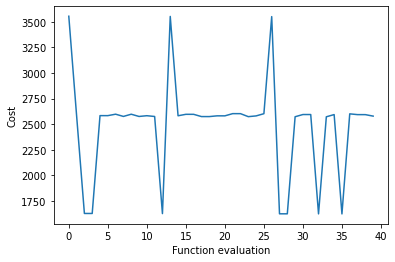

In [23]:
filename = 'deleteme-minibatch/_rank00000.h5'
with h5py.File(filename, 'r') as f:
    trajectory = f['/multistarts/0/iterCostFunCost'][:]
for start in range(trajectory.shape[0]):
    plt.plot(trajectory[start])
    plt.gca().set_xlabel("Function evaluation")
    plt.gca().set_ylabel("Cost")
#trajectory

### Compare learning rates

In [25]:
learningRates = np.logspace(-2, -5, 4)
for i, learningRate in enumerate(learningRates):
    curInputFile = "example-data-minibatch-rate-%d.h5" % i
    outprefix = "deleteme-minibatch-rate-%d/" % i
    !cp {hdf5FileMinibatch} {curInputFile}
    !{optimizationOptionsPy} {curInputFile} -s minibatch/startLearningRate learningRate
    !{optimizationOptionsPy} {curInputFile} -s minibatch/endLearningRate 1e-5
    !PARPE_MAX_SIMULATIONS_PER_PACKAGE=1 PARPE_NO_DEBUG=1 \
            mpiexec -np 4 --allow-run-as-root {example_binary_dir}/example_steadystate_multi \
                --mpi -o {outprefix} {hdf5FileMinibatch}

[2020-06-24 18:04:11] [INF] [0:140128563488704/dweindl-ThinkPad-L480] Running with 4 MPI processes.
[2020-06-24 18:04:11] [INF] [0:140128563488704/dweindl-ThinkPad-L480] Reading random initial theta 0 from /optimizationOptions/randomStarts
[2020-06-24 18:04:11] [INF] [0:140128139867904/dweindl-ThinkPad-L480] [o0e0b1] iter: 0 cost: 1628.7 time_iter: wall: 0.0651095s cpu: 0.101819s time_optim: wall: 0.0651098s cpu: 0.101819s
[2020-06-24 18:04:11] [INF] [0:140128139867904/dweindl-ThinkPad-L480] [o0e1b1] iter: 1 cost: 1628.57 time_iter: wall: 0.0477085s cpu: 0.0842107s time_optim: wall: 0.112819s cpu: 0.18603s
[2020-06-24 18:04:11] [INF] [0:140128139867904/dweindl-ThinkPad-L480] [o0e2b1] iter: 2 cost: 2598.55 time_iter: wall: 0.0467025s cpu: 0.081893s time_optim: wall: 0.159521s cpu: 0.267923s
[2020-06-24 18:04:11] [INF] [0:140128139867904/dweindl-ThinkPad-L480] [o0e3b1] iter: 3 cost: 2584.15 time_iter: wall: 0.0488849s cpu: 0.0847768s time_optim: wall: 0.208406s cpu: 0.3527s
[2020-06-24 1

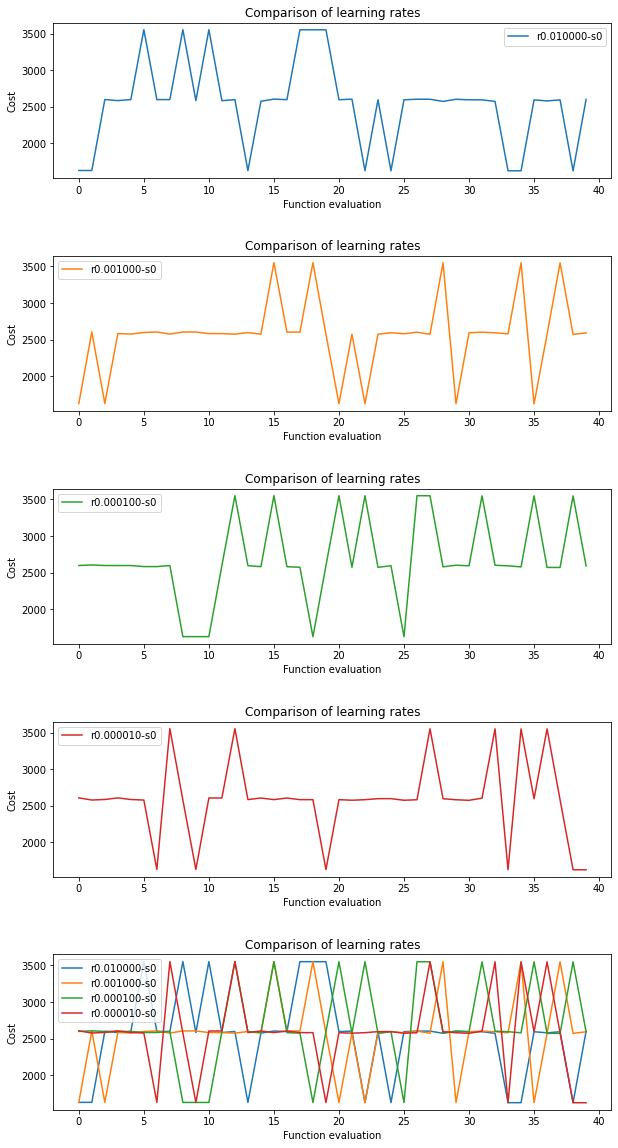

In [26]:
fig, axs = plt.subplots(nrows=len(learningRates) + 1, figsize=(10, 20))
for i, learningRate in enumerate(learningRates):
    filename = "deleteme-minibatch-rate-%d/_rank00000.h5" % i
    with h5py.File(filename, 'r') as f:
        trajectory = f['/multistarts/0/iterCostFunCost'][:]
    for start in range(trajectory.shape[0]):
        # Individual plot + overlay
        for ax in (axs[i], axs[-1]):
            ax.plot(trajectory[start], label="r%f-s%d"%(learningRate, start), color="C%d"%i)
            ax.set_xlabel("Function evaluation")
            ax.set_ylabel("Cost")
            ax.set_title("Comparison of learning rates")
            ax.legend()
plt.subplots_adjust(hspace=0.5)